In [1]:
import numpy as np
from pandas import DataFrame as df

### Load validation set in tensorflow format

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
validation_ds = image_dataset_from_directory(
    '../robot_or_brain_combined_data/images_by_class/validation',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=0,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 750 files belonging to 8 classes.


In [3]:
class_list = validation_ds.class_names

In [4]:
trues = [class_list[int(y)] for _x, y in validation_ds.unbatch()]

### Print class counts for each split

In [5]:
df([y for y in trues]).value_counts()

None of the above                  267
Acting or Performing machine       168
Collaborative or Interactive AI    109
Thinking machine                    94
Complex AI                          87
Mysterious AI                       13
Superior human                       8
Learning or recognition machine      4
dtype: int64

Some of these counts are horrible. The number of examples in 'Learning or recognition machine', 'Superior human' and 'Mysterious AI' are really too small. Also, the 'None of the above' class is very large, although that's not really a problem.

### Load our trained model

In [6]:
import tensorflow as tf
# model = tf.keras.models.load_model('./fine_tuned_model_3m6herki')
# model = tf.keras.models.load_model('./fine_tuned_model_3f0vzk68')
model = tf.keras.models.load_model('./fine_tuned_model_qdesgan9')



### Make predictions

In [7]:
logits = model.predict(validation_ds)
predicted = [class_list[v] for v in np.argmax(logits, 1)]
from pandas import DataFrame as df
print(df(predicted).value_counts())
print('/n')
print(df(trues).value_counts())

24/24 [==============================] - 49s 2s/step
None of the above                  294
Acting or Performing machine       143
Thinking machine                   114
Collaborative or Interactive AI     97
Complex AI                          81
Mysterious AI                       13
Superior human                       8
dtype: int64
/n
None of the above                  267
Acting or Performing machine       168
Collaborative or Interactive AI    109
Thinking machine                    94
Complex AI                          87
Mysterious AI                       13
Superior human                       8
Learning or recognition machine      4
dtype: int64


### Performance metrics for ResNet50 based classifier

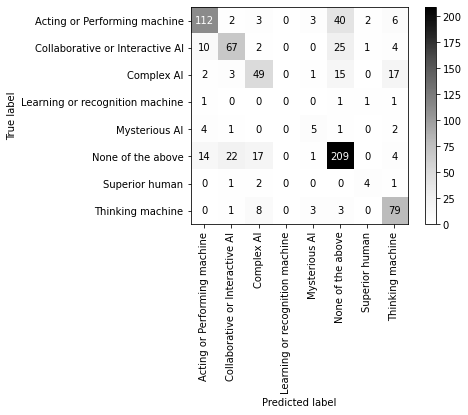

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(trues, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,                               display_labels=class_list)
_ = disp.plot(cmap='Greys', xticks_rotation='vertical')


In [9]:
from utils import display_performance_metrics

display_performance_metrics(trues, predicted, class_list)


C:\Users\ChristiaanMeijer\anaconda3\envs\robot\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,recall,precision,f1
Acting or Performing machine,0.67,0.78,0.72
Collaborative or Interactive AI,0.61,0.69,0.65
Complex AI,0.56,0.60,0.58
Learning or recognition machine,0.00,0.00,0.00
Mysterious AI,0.38,0.38,0.38
None of the above,0.78,0.71,0.75
Superior human,0.50,0.50,0.50
Thinking machine,0.84,0.69,0.76


,score
accuracy,0.70
krippendorff alpha,0.58
